In [12]:
import numpy as np
from sympy import symbols, Matrix
from scipy.integrate import solve_ivp
import scipy.linalg as la
import matplotlib.pylab as plt

In [13]:
tspan = np.linspace(0, 100, 100)

def sortEig(A):
    l, v = la.eig(A)
    idx = np.argsort(np.abs(l))
    l_sorted = l[idx]
    v_sorted = v[:, idx]
    return l_sorted, v_sorted

def ode_system(t, y, R12, R14, R23, R25, R36, R45, R56, KA, KR, gamma3, gamma4, gamma5, delta, damp1 = 1, damp2 = 1, damp3 = 1, damp4 = 1, damp5 = 1, damp6 = 1):
    n1, n2, n3, n4, n5, P = y * [damp1, damp2, damp3, damp4, damp5, damp6]
    sum_n345 = n3 + n4 + n5
    CC_A = 1 - sum_n345 / KA
    CC_R = 1 - sum_n345 / KR
    dn1dt = - (R12 + R14)*n1
    dn2dt = R12*n1 - (R23 + R25)*n2
    dn3dt = R23*n2 - R36*n3 + gamma3*n3*CC_A - delta*n3
    dn4dt = R14*n1 - R45*n4 + gamma4*n4*CC_R - delta*n4
    dn5dt = R25*n2 + R45*n4 - R56*n5 + gamma5*n5*CC_R - delta*n5
    dPdt = (R56*n5 + R36*n3)*(1-P)
    return [dn1dt, dn2dt, dn3dt, dn4dt, dn5dt, dPdt]

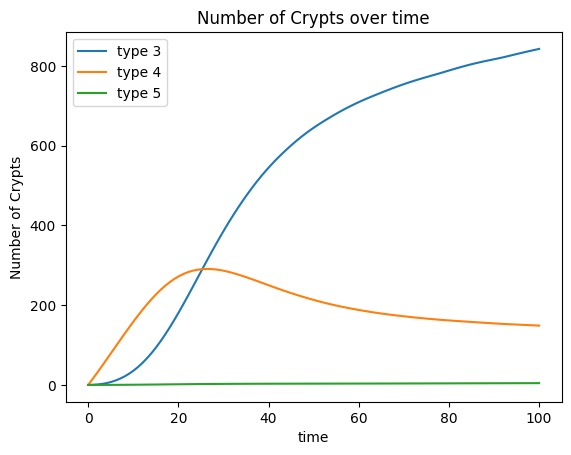

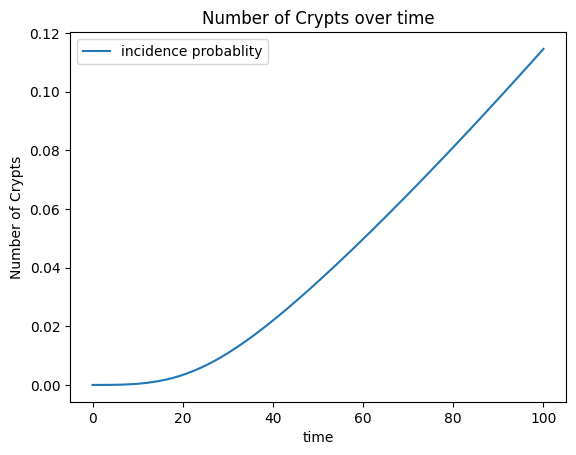

In [14]:
r1 = 150
N_crypts = 1e+7
u = 10e-7 * r1
mu = 10e-9 * r1
gamma3 = 0.2
gamma4 = 0.077
gamma5 = 0.077
delta = 0.05
KA = 1000
KR = 600
sol = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta))

# plt.plot(sol.t, sol.y[0,:], label='1') # this is too big to plot
# plt.plot(sol.t, sol.y[1,:], label="type 2") # linear growth
plt.plot(sol.t, sol.y[2,:], label="type 3")
plt.plot(sol.t, sol.y[3,:], label="type 4")
plt.plot(sol.t, sol.y[4,:], label="type 5")
# plt.plot(sol.t, sol.y[5,:], label='incidence probablity')
plt.xlabel('time')
plt.ylabel('Number of Crypts')
plt.legend(loc='upper left')
plt.title("Number of Crypts over time")
plt.savefig('figures/Simulation.png')
plt.show()

plt.plot(sol.t, sol.y[5,:], label='incidence probablity')
plt.xlabel('time')
plt.ylabel('Number of Crypts')
plt.legend(loc='upper left')
plt.title("Number of Crypts over time")
plt.savefig('figures/Simulation.png')
plt.show()

sensitivities matrix S =
 [[0.0000e+00 0.0000e+00 1.9940e-06 0.0000e+00 0.0000e+00 1.9940e-11]
 [0.0000e+00 0.0000e+00 9.9900e-04 0.0000e+00 0.0000e+00 9.9901e-09]
 [0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e-05]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]]
Max Value: 1.0
Max Position: (np.int64(2), np.int64(2))
elasticities matrix E =
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Max Value: (1+0j)
Max Position: (np.int64(2), np.int64(2))


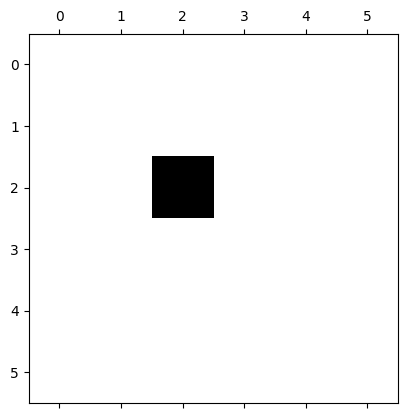

In [15]:
# Define the symbols used in the matrix
R12, R14, R23, R25, R36, R45, R56 = symbols('R12 R14 R23 R25 R36 R45 R56')
K_A, K_R, gamma_3, gamma_4, gamma_5, delta = symbols('K_A K_R gamma_3 gamma_4 gamma_5 delta')
n3, n4, n5, P = symbols('n3 n4 n5 P')

# Define A, B, and C as per the provided equations
A = -R36 + gamma_3 - (2 * gamma_3 * n3) / K_A - (gamma_3 * n4) / K_A - (gamma_3 * n5) / K_A - delta
B = -R45 + gamma_4 - (gamma_4 * n3) / K_R - (2 * gamma_4 * n4) / K_R - (gamma_4 * n5) / K_R - delta
C = -R56 + gamma_5 - (gamma_5 * n3) / K_R - (gamma_5 * n4) / K_R - (2 * gamma_5 * n5) / K_R - delta

# Define the matrix J
J = Matrix([
    [-R12 - R14, 0, 0, 0, 0, 0],
    [R12, -R23 - R25, 0, 0, 0, 0],
    [0, R23, A, -gamma_3 * n3 / K_A, -gamma_3 * n3 / K_A, 0],
    [R14, 0, -gamma_4 * n4 / K_R, B, -gamma_4 * n4 / K_R, 0],
    [0, R25, -gamma_5 * n5 / K_R, R45 - gamma_5 * n5 / K_R, C, 0],
    [0, 0, R36 - R36 * P, 0, R56 - R56 * P, -R56 * n5 - R36 * n3]
])

# Display the original matrix J
# print("Matrix J:", J)

# Substitute n3, n4, n5, and P = 0 into the matrix (1st equilibrium points)
J_equilibrium = J.subs({n3: 0, n4: 0, n5: 0, P: 0})

# Display the evaluated matrix
# print("Evaluated Matrix J:", J_equilibrium)
values = {
    R12: 2*u, R14: mu, R23: u, R25: mu, R36: mu, R45: 2*u, R56: u, N_crypts: 1e7,
    K_A: 1000, K_R: 600, gamma_3: 0.2, gamma_4: 0.077, gamma_5: 0.077, delta: 0.05
}
J_result = np.array(J_equilibrium.subs(values).tolist(), dtype=float)

# compute sensitivity and elasticity matrix
l_right, v_right = sortEig(J_result)
v_right_max = v_right[:,-1]

l_left, v_left = sortEig(np.transpose(J_result))
v_left_max = v_left[:,-1]

np.set_printoptions(precision=4)
S = np.outer(v_left_max,v_right_max) / np.dot(v_left_max,v_right_max)
print("sensitivities matrix S =\n", np.real(S))

max_value_S = np.max(S)
max_position_S = np.unravel_index(np.argmax(S), S.shape)

print("Max Value:", max_value_S)
print("Max Position:", max_position_S)

E = S * J_result / l_left[-1]
print("elasticities matrix E =\n", np.real(E))

max_value_E = np.max(E)
max_position_E = np.unravel_index(np.argmax(E), E.shape)

print("Max Value:", max_value_E)
print("Max Position:", max_position_E)
plt.spy(np.real(E))

Case 1: SSE = 0.3121710674997783
Case 2: SSE = 0.31217257476781957
Case 3: SSE = 0.312246882833447
Case 4: SSE = 0.3121593240470053
Case 5: SSE = 0.3121623164199711
Max SSE occurs at case 3, with value: 0.312246882833447


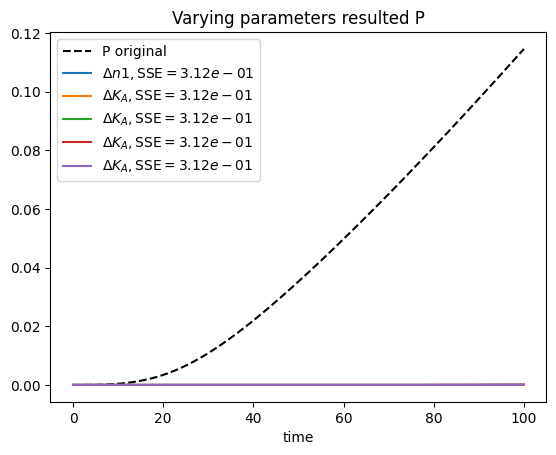

In [ ]:
# simulated variation in parameters 
N_crypts = 1e+7
u = 10e-7
mu = 10e-9
gamma3 = 0.2
gamma4 = 0.077
gamma5 = 0.077
delta = 0.05
KA = 1000
KR = 600

sol_1 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 0.9, 1, 1, 1, 1, 1))
sol_2 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 0.9, 1, 1, 1, 1))
sol_3 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 0.9, 1, 1, 1))
sol_4 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 1, 0.9, 1, 1))
sol_5 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 1, 1, 0.9, 1))

# Compute SSE (Sum of Squared Errors) for each case. Notice the less the SSE the less the perturbation due to varying parameters. So we are looking for the max deviation.
# SSEs = []
# for i, sol_case in enumerate([sol_1, sol_2, sol_3, sol_4, sol_5], start=1):
#     sse = np.sum((sol.y[5, :] - sol_case.y[5, :]) ** 2)
#     print(f"Case {i}: SSE = {sse}")
#     SSEs.append(sse)
    
# max_SSE_value = max(SSEs)
# max_SSE_case = SSEs.index(max_SSE_value) + 1  # Adding 1 to match the 1-based indexing in the print output

# print(f"Max SSE occurs at case {max_SSE_case}, with value: {max_SSE_value}")

# plt.plot(sol.t, sol.y[5,:], label='P original', linestyle='--', color='black')
# plt.plot(sol.t, sol_1.y[5, :], label=fr'$\Delta n1, \mathrm{{SSE}} = {SSEs[0]:.2e}$')
# plt.plot(sol.t, sol_2.y[5, :], label=fr'$\Delta K_A, \mathrm{{SSE}} = {SSEs[0]:.2e}$')
# plt.plot(sol.t, sol_3.y[5, :], label=fr'$\Delta K_A, \mathrm{{SSE}} = {SSEs[0]:.2e}$')
# plt.plot(sol.t, sol_4.y[5, :], label=fr'$\Delta K_A, \mathrm{{SSE}} = {SSEs[0]:.2e}$')
# plt.plot(sol.t, sol_5.y[5, :], label=fr'$\Delta K_A, \mathrm{{SSE}} = {SSEs[0]:.2e}$')
# plt.xlabel('time')
# plt.legend(loc='upper left')
# plt.title("Varying parameters resulted P")
# # plt.savefig('figures/Sensitivity.png')
# plt.show()

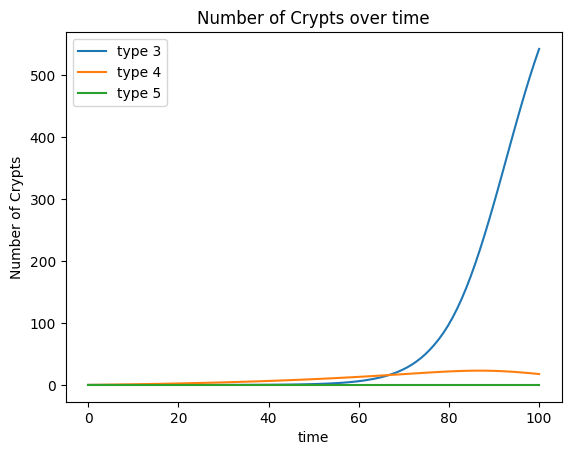

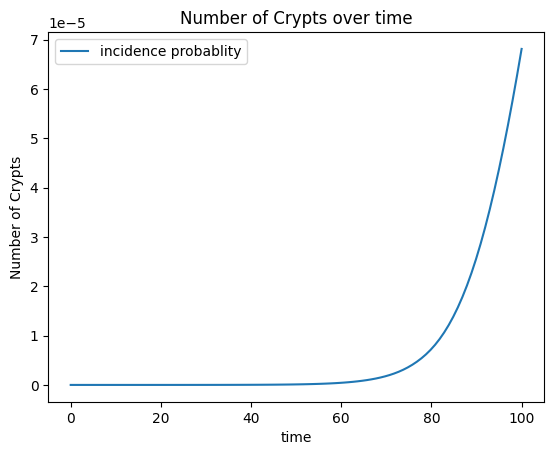

In [19]:
plt.plot(sol.t, sol_1.y[2,:], label="type 3")
plt.plot(sol.t, sol_1.y[3,:], label="type 4")
plt.plot(sol.t, sol_1.y[4,:], label="type 5")
# plt.plot(sol.t, sol.y[5,:], label='incidence probablity')
plt.xlabel('time')
plt.ylabel('Number of Crypts')
plt.legend(loc='upper left')
plt.title("Number of Crypts over time")
plt.savefig('figures/Simulation.png')
plt.show()

plt.plot(sol.t, sol_1.y[5,:], label='incidence probablity')
plt.xlabel('time')
plt.ylabel('Number of Crypts')
plt.legend(loc='upper left')
plt.title("Number of Crypts over time")
plt.savefig('figures/Simulation.png')
plt.show()